<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/Transfer%20Learning%20(Bert%2C%20T5%2C%20LLaMa%2C%20etc..%20(transformers)/Sentiment%20Analysis/Sentiment_Analysis_using_Vaders_and_Roberta_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

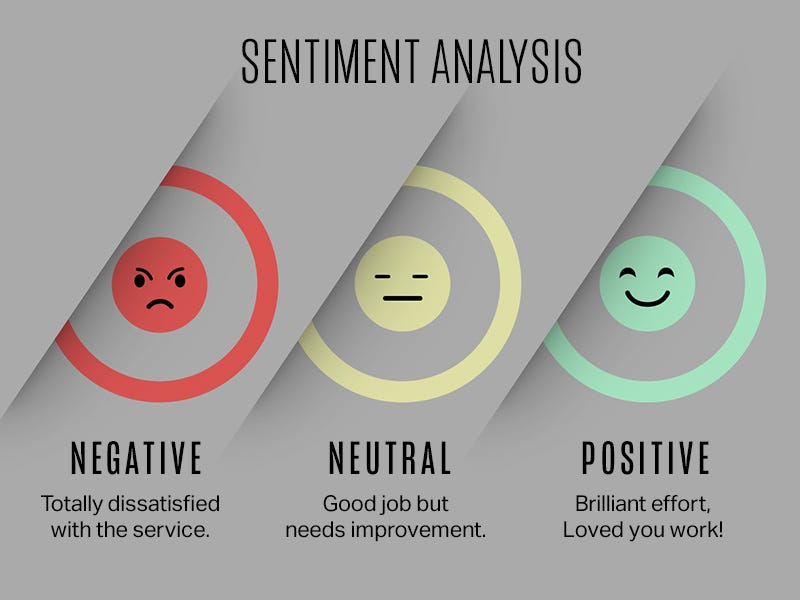
#**Project Summary: Sentiment Analysis on Amazon Reviews Using VADER And Roberta Pre-trained model to compare accuracy**

##**Overview**
This project applies the VADER and Roberta to classify customer feedback from the Amazon Product Reviews dataset (Kaggle). After preprocessing the review text, both VADER and Roberta effectively categorized each review into positive, neutral, or negative sentiment, capturing both polarity and intensity with strong consistency and interpretability.

---
##**Aim of the Project**
To analyze customer opinions and detect sentiment patterns without the need for heavy model training.

To demonstrate how VADER and Roberta Pre-trained model can deliver fast, actionable sentiment insights from large review datasets.

##**Importing Libraries**

In [200]:
import pandas as pd
import nltk
from tqdm.notebook import tqdm
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DisneylandReviews.csv", encoding="latin1")
df = df[:2000]

##**Removing duplicate values from Dataset**

In [202]:
df.drop_duplicates(inplace=True)

##**viewing the number of values of each rate**

In [240]:
df["Rating"].value_counts().sort_index()

,count
Rating,
1,27
2,65
3,275
4,638
5,995


##**Bar_Chart Representation**

<Axes: title={'center': 'Rating stars by Counts'}, xlabel='Rating', ylabel='Counts'>

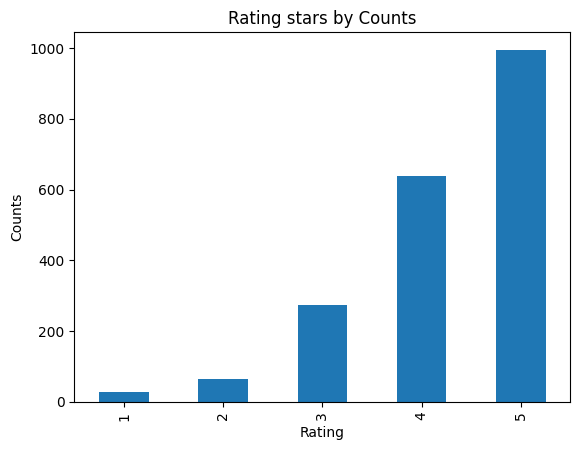

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline
df["Rating"].value_counts().sort_index() \
.plot(kind="bar", ylabel="Counts",
      title="Rating stars by Counts")

##**Creating example sample from my dataset**

In [204]:
example = df['Review_Text'][529]
example

"Just spent 6 hours at Disneyland with our 8 year old granddaughter! This is not the first time we've been there with her, but we can see at this age, her height qualifies her for more exciting rides! Some rides were reserved for her an her grandfather, but others, we could all enjoy! Our trip was the latter part of October, so apparently it had cooled down a bit. Comfortable but warm. It is a very fun place for all!!"

##**Preparing Sentiment model from nltk to analyze text**

In [205]:
from nltk.sentiment import SentimentIntensityAnalyzer
def polarity_scores(example):
  sia = SentimentIntensityAnalyzer()
  input= sia.polarity_scores(example)
  return input

##**Testing on my example**

In [241]:
polarity_scores(example)

{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.9747}

##**Running model on my main Text data's iterating through all.**  Progress bar was used to monitor progress.

In [206]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row["Review_Text"]
  name = row["Review_ID"]
  res[name] = polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

##**Merging varders result with dataframe**

In [207]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.merge(df, left_index=True, right_on='Review_ID', how='left')
Vaders

,neg,neu,pos,compound,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0.000,0.887,0.113,0.7069,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,0.040,0.730,0.231,0.9901,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,0.024,0.742,0.235,0.9920,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,0.080,0.760,0.160,0.8489,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,0.000,0.899,0.101,0.2846,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...
1995,0.010,0.882,0.108,0.9901,507251039,5,2017-5,United States,Took the Metro from hotel to Disney. You take ...,Disneyland_HongKong
1996,0.097,0.680,0.224,0.9171,507176647,5,2016-12,United States,"Yes, it's smaller than most Disney's you have ...",Disneyland_HongKong
1997,0.083,0.829,0.088,0.2948,507148671,5,2016-8,India,We had full masti for the time we were in disn...,Disneyland_HongKong
1998,0.000,0.781,0.219,0.9613,506958560,5,2017-7,China,Hong Kong Disneyland is fantastic! It captures...,Disneyland_HongKong


##**Bar_chart of what Vaders compound represents**

/tmp/ipython-input-3863971235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Vaders, x="Rating", y= "compound", palette="viridis")


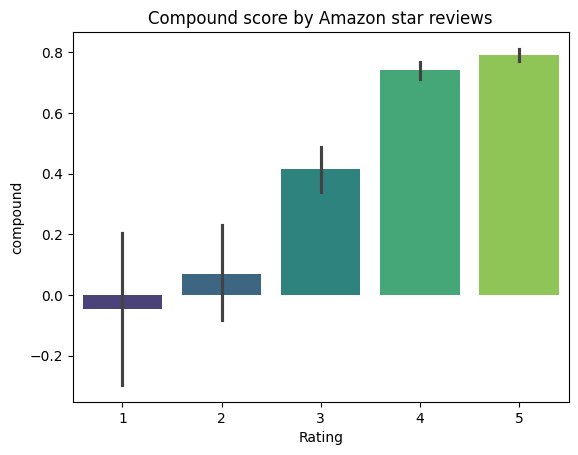



What this Means
Negative reviews has low compound score (eg: Rating 1,2,3) And Positive reviews has high compound score(eg. Rating 4,5




In [244]:
import seaborn as sns

sns.barplot(Vaders, x="Rating", y= "compound", palette="viridis")
plt.title("Compound score by Amazon star reviews")
plt.show()
print("\n")
print("What this Means")
print("Negative reviews has low compound score (eg: Rating 1,2,3) And Positive reviews has high compound score(eg. Rating 4,5")
print("\n")

##**Visualizing them by negative, neutral and positive reviews**

/tmp/ipython-input-372242385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Vaders, x="Rating", y="neg", ax =axs[0], palette="viridis" )
/tmp/ipython-input-372242385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Vaders, x="Rating", y="neu", ax =axs[1], palette="plasma")
/tmp/ipython-input-372242385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Vaders, x="Rating", y="pos", ax =axs[2], palette="magma")


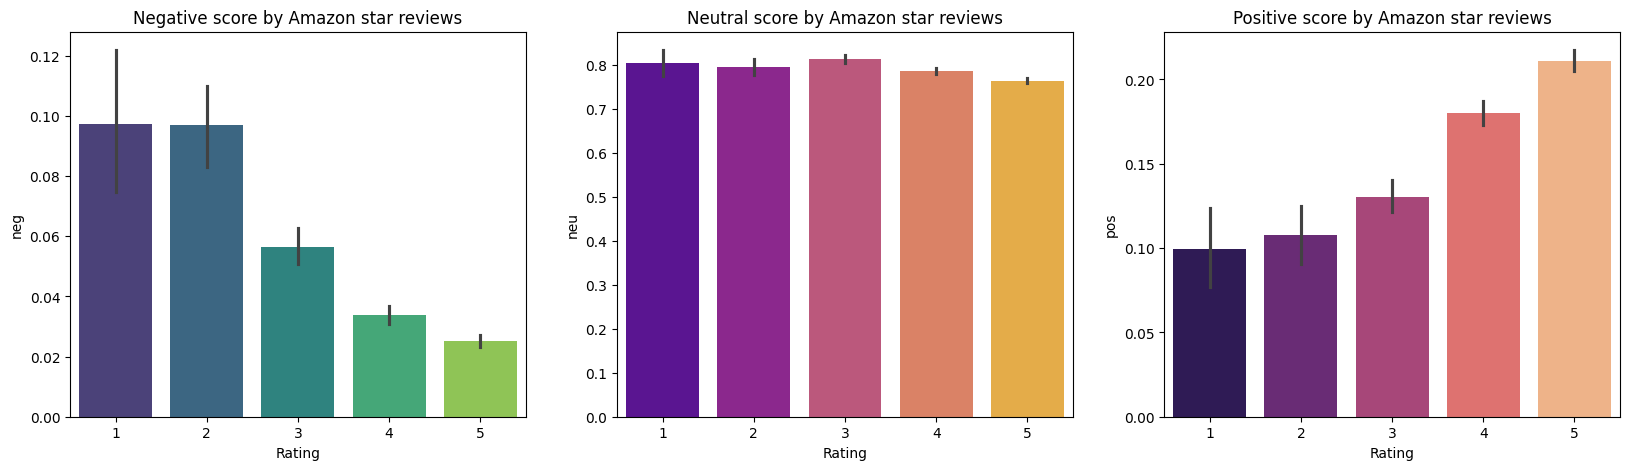

In [248]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.barplot(Vaders, x="Rating", y="neg", ax =axs[0], palette="viridis" )
sns.barplot(Vaders, x="Rating", y="neu", ax =axs[1], palette="plasma")
sns.barplot(Vaders, x="Rating", y="pos", ax =axs[2], palette="magma")
axs[0].set_title("Negative score by Amazon star reviews")
axs[1].set_title("Neutral score by Amazon star reviews")
axs[2].set_title("Positive score by Amazon star reviews")
plt.show()



##**As you can see Negative goes downwards, neural try to maintain its level while positive goes upward**

##**Result:** Take note Scores grater than 0.5 are positive and scores below 0.5 are either neutral or negative reviews 👍

In [250]:
Vaders_result = Vaders[["compound", "Rating", "Review_Text"]]
print(Vaders_result)


      compound  Rating                                        Review_Text
0       0.7069       4  If you've ever been to Disneyland anywhere you...
1       0.9901       4  Its been a while since d last time we visit HK...
2       0.9920       4  Thanks God it wasn   t too hot or too humid wh...
3       0.8489       4  HK Disneyland is a great compact park. Unfortu...
4       0.2846       4  the location is not in the city, took around 1...
...        ...     ...                                                ...
1995    0.9901       5  Took the Metro from hotel to Disney. You take ...
1996    0.9171       5  Yes, it's smaller than most Disney's you have ...
1997    0.2948       5  We had full masti for the time we were in disn...
1998    0.9613       5  Hong Kong Disneyland is fantastic! It captures...
1999    0.8074       5  Excellent place with whole day long full of en...

[2000 rows x 3 columns]


#**Using Pre-trained model (Roberta)**

In [209]:
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer

##**Download model weights and implementation**

In [210]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [234]:
import numpy as np
from scipy.special import softmax
import torch

def Roberta_polary_score(example):
  input = tokenizer(example, padding=True, truncation=True, return_tensors="pt", max_length=514)

  with torch.no_grad():
    output = model(**input)
  output= output[0][0].detach().numpy()
  text = softmax(output)

  res_dict = {"roberta_neg":text[0],
              "roberta_neu":text[1],
              "roberta_pos":text[2]}
  return res_dict

In [226]:
example

"Just spent 6 hours at Disneyland with our 8 year old granddaughter! This is not the first time we've been there with her, but we can see at this age, her height qualifies her for more exciting rides! Some rides were reserved for her an her grandfather, but others, we could all enjoy! Our trip was the latter part of October, so apparently it had cooled down a bit. Comfortable but warm. It is a very fun place for all!!"

##**Comparing Vaders polarity score and Roberta score on my example**:
Vaders score 👇

In [239]:
polarity_scores(example)

{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.9747}

Roberta Score👇

In [235]:
print(Roberta_polary_score(example))

{'roberta_neg': np.float32(0.0022224877), 'roberta_neu': np.float32(0.021458589), 'roberta_pos': np.float32(0.9763189)}


##**Conclusion**
When deployed, this sentiment analysis system can:

Automatically score customer reviews and label their sentiment in real time.

Support e-commerce platforms, product analytics dashboards, and customer feedback systems.

Help businesses monitor brand perception, detect dissatisfaction, and understand user experiences at scale.

The project highlights VADER and Roberta as a lightweight but powerful tool for sentiment interpretation in real-world review data.